<a href="https://colab.research.google.com/github/freentour/AIFFEL_quest/blob/main/Main_quest/Quest02/Main_quest_pokemon_by_KJH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 0. 설계
---

# STEP 1. 데이터 살펴보기
---

## 구글 드라이브 연결

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 라이브러리 가져오기

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 데이터셋 불러오기

In [4]:
# 파일 경로 : /content/drive/MyDrive/Pokemon.csv
csv_path = "/content/drive/MyDrive/Pokemon.csv"
original_data = pd.read_csv(csv_path)

In [5]:
original_data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [7]:
# 기본 정보 확인
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [10]:
# 기본 통계 정보 확인
original_data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## 원본 데이터 복사하기

In [6]:
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [12]:
# 전설의 포켓몬 데이터셋
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [13]:
# 일반 포켓몬의 데이터셋
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# STEP 2. 데이터 전처리
---

## 중복 데이터 여부 확인하기

In [22]:
pokemon.duplicated().sum()

0

## 이상치 제거

In [11]:
# 결측치 확인
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [26]:
# 결측치에 대한 평균값 계산
pokemon.isnull().mean()

#             0.0000
Name          0.0000
Type 1        0.0000
Type 2        0.4825
Total         0.0000
HP            0.0000
Attack        0.0000
Defense       0.0000
Sp. Atk       0.0000
Sp. Def       0.0000
Speed         0.0000
Generation    0.0000
Legendary     0.0000
dtype: float64

In [32]:
# Type 2 값이 NaN인 행 인덱스만 별도로 저장
type2_na_index = pokemon[pokemon['Type 2'].isnull()].index
type2_na_index

Index([  4,   5,   9,  10,  11,  12,  13,  14,  24,  25,
       ...
       755, 762, 763, 770, 774, 775, 776, 788, 789, 792],
      dtype='int64', length=386)

In [33]:
pokemon.loc[type2_na_index]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragon,NaN,452,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


In [35]:
# Type 2 컬럼의 결측치 값을 'None'으로 대체하기(모델이 'None' 클래스로 학습할 수 있도록!!)
pokemon['Type 2'] = pokemon['Type 2'].fillna('None')

In [37]:
# 결측치가 남아있는지 재확인
pokemon.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [38]:
# 앞에서 저장해 두었던 변수를 이용해 해당 행들이 잘 채워졌는지 확인하기 (loc 사용)
pokemon.loc[type2_na_index]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,None,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,None,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,None,530,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,705,Sliggoo,Dragon,None,452,68,75,53,83,113,60,6,False
776,706,Goodra,Dragon,None,600,90,100,70,110,150,80,6,False
788,712,Bergmite,Ice,None,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,None,514,95,117,184,44,46,28,6,False


## feature 가공

In [39]:
# 포켓몬 Type 2 데이터를 중복 없이 types에 저장
types = list(set(pokemon["Type 2"]))
print(len(types))
print(types)

19
['Rock', 'Fighting', 'Grass', 'Ice', 'Psychic', 'Bug', 'Fire', 'Ghost', 'Steel', 'Flying', 'Poison', 'Ground', 'Electric', 'Dark', 'Fairy', 'None', 'Water', 'Normal', 'Dragon']


In [40]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Rock,Fighting,Grass,Ice,Psychic,Bug,Fire,Ghost,...,Flying,Poison,Ground,Electric,Dark,Fairy,None,Water,Normal,Dragon
0,Grass,Poison,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,Grass,Poison,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,Grass,Poison,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,Grass,Poison,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,Fire,None,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [41]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
 13  Rock        800 non-null    bool  
 14  Fighting    800 non-null    bool  
 15  Grass       800 non-null    bool  
 16  Ice         800 non-null    bool  
 17  Psychic     800 non-null    bool  
 18  Bug         800 non-null    bool  
 19  Fire        800 non-null    bool  
 20  Ghost     

# STEP 3. 모델링과 하이퍼 파라미터 튜닝
---

## 베이스라인 모델 훈련 및 검증

In [74]:
# feature 가공 처리하지 않은 특성 모음
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
target = 'Legendary'

In [75]:
# 원본 데이터로부터 추출
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [76]:
# 원본 데이터로부터 추출
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [77]:
# 훈련 데이터셋과 테스트 데이터셋 분리
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=15)

print(train_data.shape, train_targets.shape)
print(test_data.shape, test_targets.shape)

(640, 8) (640,)
(160, 8) (160,)


In [78]:
# K-겹 교차 검증에 사용할 기본 모델 정의, 컴파일
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Dense(24, activation="relu"),
        layers.Dense(24, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [79]:
# K-겹 교차 검증 진행
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_acc_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    acc_history = history.history["val_accuracy"]
    all_acc_histories.append(acc_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [80]:
# 정확도 평균값 계산하기
average_acc_history = [
    np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]

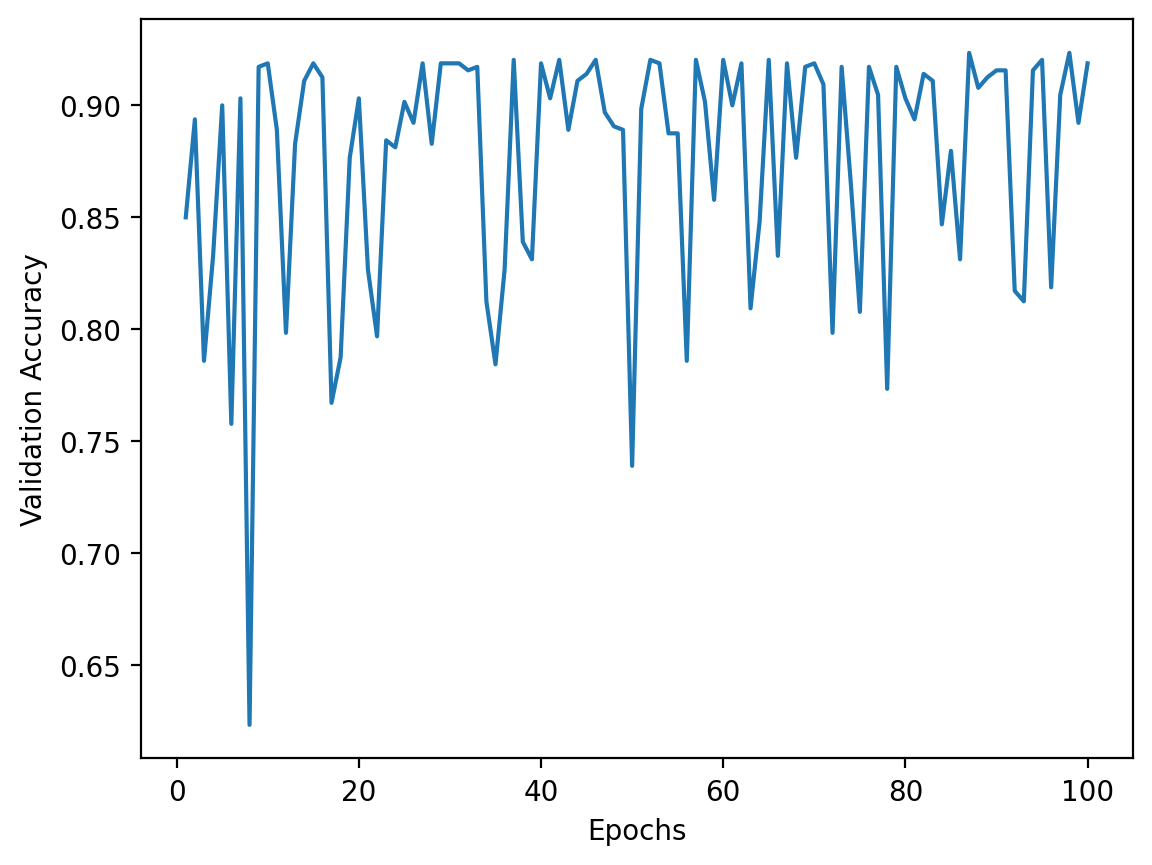

In [81]:
plt.plot(range(1, len(average_acc_history) + 1), average_acc_history)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

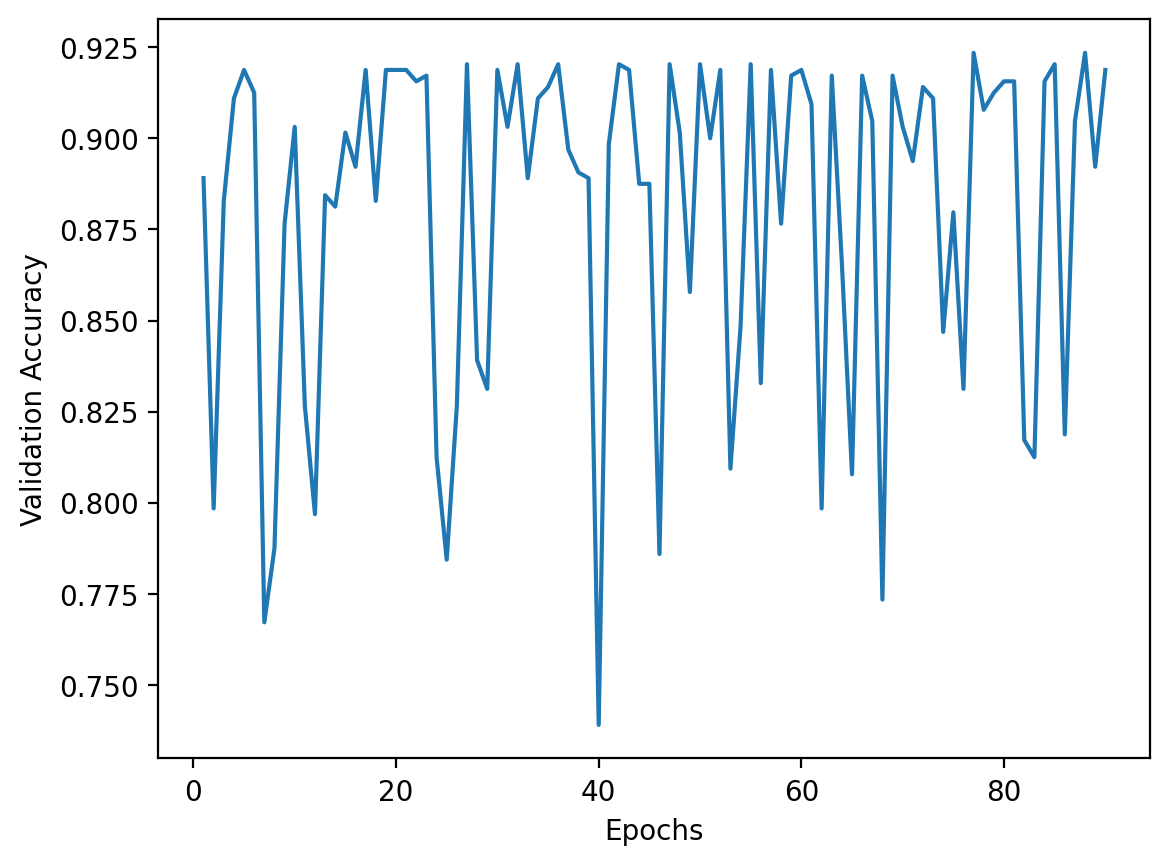

In [82]:
truncated_acc_history = average_acc_history[10:]
plt.plot(range(1, len(truncated_acc_history) + 1), truncated_acc_history)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

## 비교 모델 훈련 및 검증

In [83]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
 13  Rock        800 non-null    bool  
 14  Fighting    800 non-null    bool  
 15  Grass       800 non-null    bool  
 16  Ice         800 non-null    bool  
 17  Psychic     800 non-null    bool  
 18  Bug         800 non-null    bool  
 19  Fire        800 non-null    bool  
 20  Ghost     

In [84]:
types

['Rock',
 'Fighting',
 'Grass',
 'Ice',
 'Psychic',
 'Bug',
 'Fire',
 'Ghost',
 'Steel',
 'Flying',
 'Poison',
 'Ground',
 'Electric',
 'Dark',
 'Fairy',
 'None',
 'Water',
 'Normal',
 'Dragon']

In [85]:
# Generation 특성 제외
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed',
            'Rock', 'Fighting', 'Grass', 'Ice', 'Psychic', 'Bug', 'Fire', 'Ghost', 'Steel', 'Flying',
            'Poison', 'Ground', 'Electric', 'Dark', 'Fairy', 'None', 'Water', 'Normal', 'Dragon']

target = "Legendary"

In [89]:
pokemon = pokemon.replace({True:1, False:0})
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Flying,Poison,Ground,Electric,Dark,Fairy,None,Water,Normal,Dragon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,0,1,0,0,0,0,0,0,0,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,0,1,0,0,0,0,0,0,0,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,0,1,0,0,0,0,0,0,0,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,0,1,0,0,0,0,0,0,0,0
4,4,Charmander,Fire,None,309,39,52,43,60,50,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,0,0,0,0,0,1,0,0,0,0
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,...,0,0,0,0,0,1,0,0,0,0
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,...,0,0,0,0,0,0,0,0,0,0
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,...,0,0,0,0,1,0,0,0,0,0


In [100]:
# 데이터 정규화


In [90]:
X = pokemon[features]
print(X.shape)
X.head()

(800, 27)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Rock,Fighting,...,Flying,Poison,Ground,Electric,Dark,Fairy,None,Water,Normal,Dragon
0,318,45,49,49,65,65,45,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,405,60,62,63,80,80,60,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,525,80,82,83,100,100,80,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,625,80,100,123,122,120,80,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,309,39,52,43,60,50,65,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [91]:
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    0
1    0
2    0
3    0
4    0
Name: Legendary, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(X, y, test_size=0.2, random_state=15)

print(train_data.shape, train_targets.shape)
print(test_data.shape, test_targets.shape)

(640, 27) (640,)
(160, 27) (160,)


In [93]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Dense(24, activation="relu"),
        layers.Dense(24, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [94]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_acc_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    acc_history = history.history["val_accuracy"]
    all_acc_histories.append(acc_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [95]:
# 정확도 평균값 계산하기
average_acc_history = [
    np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]

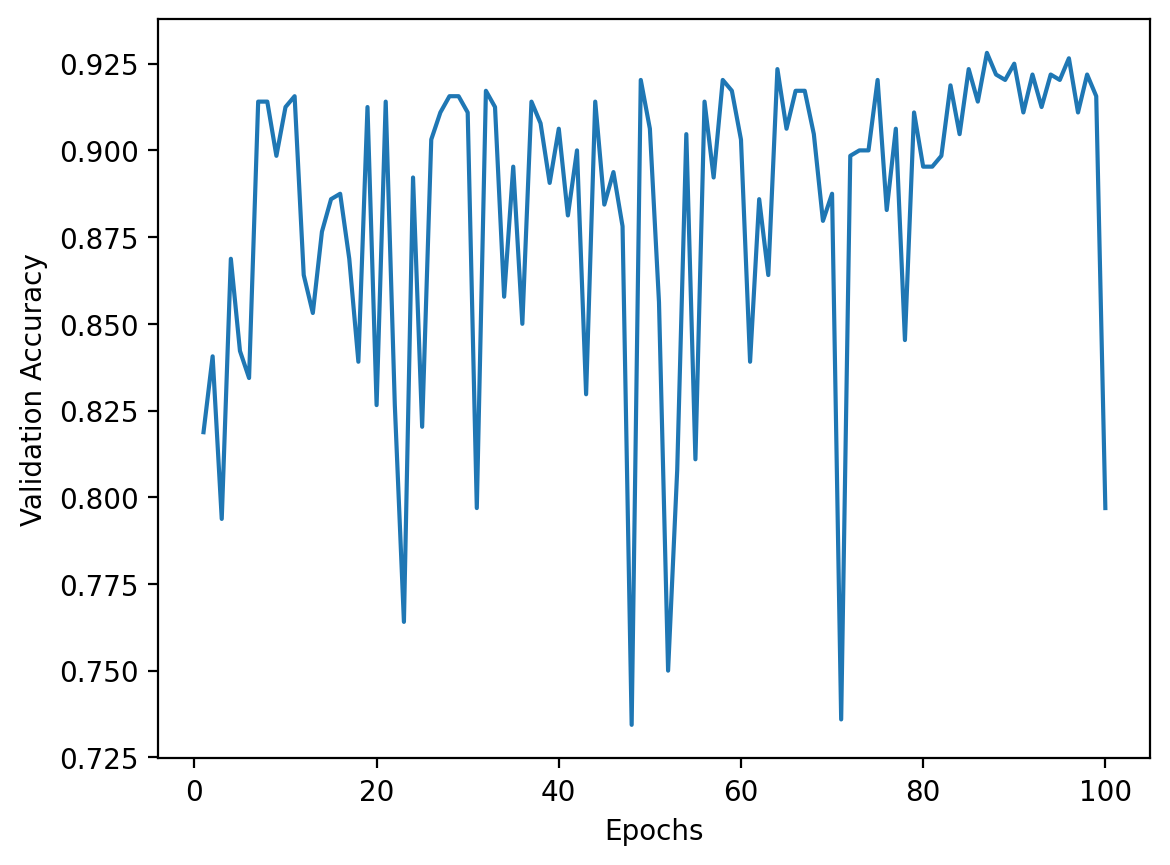

In [96]:
plt.plot(range(1, len(average_acc_history) + 1), average_acc_history)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

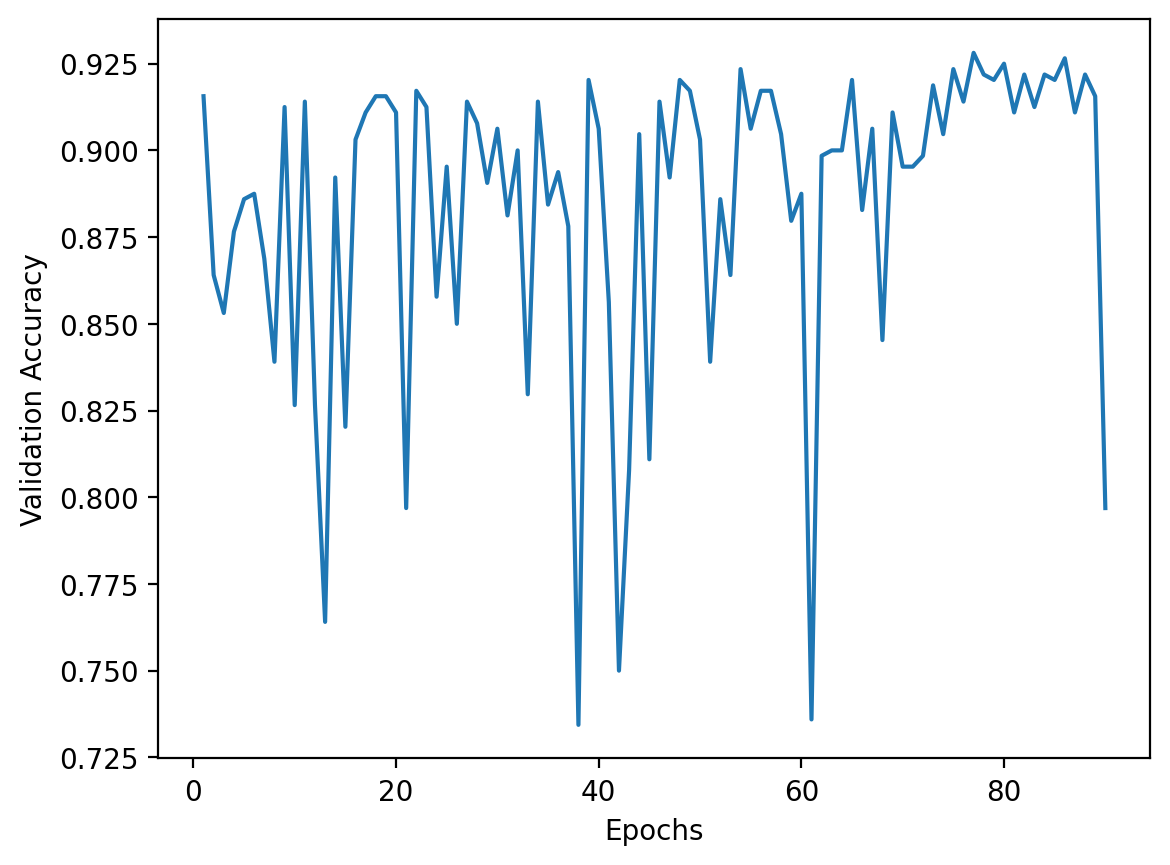

In [97]:
truncated_acc_history = average_acc_history[10:]
plt.plot(range(1, len(truncated_acc_history) + 1), truncated_acc_history)
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

# STEP 4. 최종 모델 테스트
---

# STEP 5. Summary
---

# 회고
---

- 데이터 전처리 과정에서 데이터 정규화를 하지 못해 신경망이 정상적으로 학습을 진행하지 못하는 것 같음.
- 데이터의 불균형이 있기 때문에 정확도 이외에 다른 평가지표를 사용해야 하는데, 해당 사항을 적용하지 못함.
- 최종적인 완성을 보진 못했지만 전체 플로우를 처음부터 끝까지 진행해봐서 좋았음.

# References
---